# Interval Statistic
Interval statistic is library to calculate interval estimations of an average and a variance.

There are several algorithms to estimate a variance:

- by confidence probability
- by variance point estimation

Load Libraries

In [4]:
using IntervalStatistic
using Distributions
using ValidatedNumerics
using Plots
pyplot(reuse=true)
srand(10)

MersenneTwister(Base.dSFMT.DSFMT_state(Int32[1007524736,1073256705,415953332,1072893275,-601364280,1073193666,-1335760268,1072926448,1521827180,1073499520  …  -439825479,1072978026,-411693740,1073111955,-1611334130,1963385220,236575170,-789052601,382,0]),[1.11258,1.36831,1.34445,1.05665,1.12078,1.17957,1.38181,1.8151,1.24221,1.81978  …  1.65822,1.49011,1.00684,1.42501,1.56311,1.52724,1.45901,1.55851,1.96219,1.38824],382,UInt32[0x0000000a])

In [5]:
to_errors = (i) -> [i.lo i.hi] - mid(i)

function show_result(value, position)
    label = value[2]
    data = value[1]
    println(label, ": ", data)
    scatter!(
        [position], (x) -> mid(data), yerror=to_errors(data), 
        label=label
    )
end

show_result (generic function with 1 method)

Generate samples of normal distribution

In [6]:
d = Normal()
length = 100
confidence_probability = 0.95
values = rand(d, length)
mu, sigma = params(d)
average = reduce(+, values) / length
variance = mapreduce((x) -> (x - average)^2, +, values) / length

0.7355592514897548

[Plots.jl] Initializing backend: pyplot
confidence probability: [0.572767, 1.00266]
point variance: [0.569953, 0.99773]



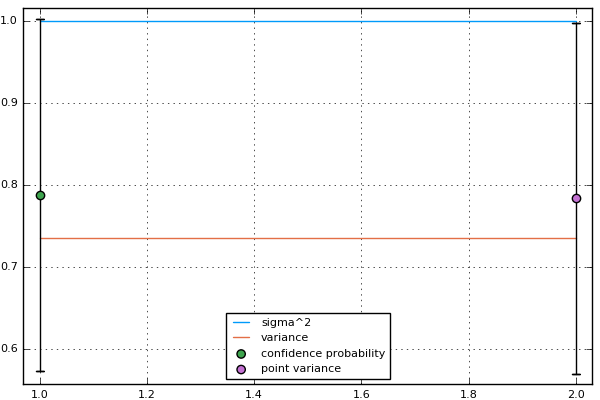

In [7]:
result_by_confidence_probability = [
    IntervalStatistic.var(values, IntervalStatistic.Variance.byConfidenceProbability(
        confidence_probability
    )),
    "confidence probability"
]
result_by_point_variance = [
    IntervalStatistic.var(values, IntervalStatistic.Variance.byPointVariance(
        confidence_probability, variance
    )),
    "point variance"
]

plot([1.0;2.0], (x) -> sigma^2, label="sigma^2")
plot!([1.0;2.0], (x) -> variance, label="variance")
show_result(result_by_confidence_probability, 1)
show_result(result_by_point_variance, 2)

Generate samples of normal distribution with mu=100 sigma=4

In [8]:
d = Normal(100, 4)
length = 100
confidence_probability = 0.95
values = rand(d, length)
mu, sigma = params(d)
average = reduce(+, values) / length
variance = mapreduce((x) -> (x - average)^2, +, values) / length

13.424872875702043

confidence probability: [10.4537, 18.2998]
point variance: [10.4023, 18.2099]



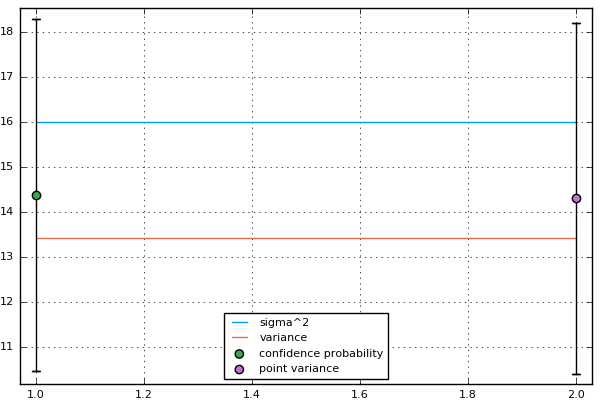

In [9]:
result_by_confidence_probability = [
    IntervalStatistic.var(values, IntervalStatistic.Variance.byConfidenceProbability(
        confidence_probability
    )),
    "confidence probability"
]
result_by_point_variance = [
    IntervalStatistic.var(values, IntervalStatistic.Variance.byPointVariance(
        confidence_probability, variance
    )),
    "point variance"
]

plot([1.0;2.0], (x) -> sigma^2, label="sigma^2")
plot!([1.0;2.0], (x) -> variance, label="variance")
show_result(result_by_confidence_probability, 1)
show_result(result_by_point_variance, 2)